<a href="https://colab.research.google.com/github/icemduru/codecademy_Classify_X-rays_With_Machine_Learning/blob/main/Classify_X_rays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy



In [35]:
training_data_generator = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        rotation_range=30,
        width_shift_range=0.05,
        height_shift_range=0.05)

In [36]:
training_iterator = training_data_generator.flow_from_directory(
    '/content/drive/MyDrive/Covid19-dataset/train',class_mode='categorical',color_mode='grayscale',batch_size=24)
training_iterator.next()

Found 251 images belonging to 3 classes.


(array([[[[5.1853269e-02],
          [5.4047089e-02],
          [5.1817268e-02],
          ...,
          [7.7212058e-02],
          [2.1137759e-01],
          [6.3086450e-01]],
 
         [[5.1573794e-02],
          [5.4290567e-02],
          [5.1609796e-02],
          ...,
          [5.4540843e-01],
          [9.6489537e-01],
          [6.1725348e-01]],
 
         [[5.3040061e-02],
          [5.2824296e-02],
          [5.3076062e-02],
          ...,
          [7.0234591e-01],
          [2.8464401e-01],
          [7.9591267e-02]],
 
         ...,
 
         [[0.0000000e+00],
          [0.0000000e+00],
          [2.3653356e-03],
          ...,
          [7.0350802e-01],
          [6.9355983e-01],
          [6.7987061e-01]],
 
         [[1.6380504e-03],
          [5.2081519e-03],
          [1.2473256e-01],
          ...,
          [6.9910920e-01],
          [7.0675623e-01],
          [6.7547172e-01]],
 
         [[3.3821888e-02],
          [4.8008457e-01],
          [9.2634726e-01],
   

In [37]:
validation_data_generator = ImageDataGenerator(rescale=1./255)
validation_iterator = validation_data_generator.flow_from_directory(
    "/content/drive/MyDrive/Covid19-dataset/test",class_mode='categorical',color_mode='grayscale',batch_size=24)
#validation_iterator.next()

Found 66 images belonging to 3 classes.


In [43]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(256, 256, 1)))
model.add(layers.Conv2D(5, 5, strides=3, activation="relu")) 
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(4, 4, strides=1, activation="relu")) 
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(3, 3, strides=1, activation="relu")) 
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(layers.Dropout(0.1))

model.add(layers.Flatten())
model.add(tf.keras.layers.Dense(3,activation="softmax"))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 84, 84, 5)         130       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 42, 42, 5)        0         
 g2D)                                                            
                                                                 
 dropout_31 (Dropout)        (None, 42, 42, 5)         0         
                                                                 
 conv2d_32 (Conv2D)          (None, 39, 39, 4)         324       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 19, 19, 4)        0         
 g2D)                                                            
                                                                 
 dropout_32 (Dropout)        (None, 19, 19, 4)       

In [44]:
es = EarlyStopping(monitor='val_auc_8', mode='min', verbose=1, patience=15)
model.compile(
   optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.AUC()]
)

In [45]:
history = model.fit(
        training_iterator,
        steps_per_epoch=training_iterator.samples/24,
        epochs=55,
        validation_data=validation_iterator,
        validation_steps=validation_iterator.samples/24,
        callbacks=[es])

Epoch 1/55
10/10 [==============================] - 4s 278ms/step - loss: 1.1143 - categorical_accuracy: 0.4223 - auc_8: 0.5428 - val_loss: 1.0958 - val_categorical_accuracy: 0.3939 - val_auc_8: 0.5485
Epoch 2/55
10/10 [==============================] - 2s 231ms/step - loss: 1.0912 - categorical_accuracy: 0.4462 - auc_8: 0.5816 - val_loss: 1.0912 - val_categorical_accuracy: 0.3939 - val_auc_8: 0.5956
Epoch 3/55
10/10 [==============================] - 2s 222ms/step - loss: 1.0847 - categorical_accuracy: 0.4542 - auc_8: 0.6190 - val_loss: 1.0807 - val_categorical_accuracy: 0.3939 - val_auc_8: 0.6736
Epoch 4/55
10/10 [==============================] - 2s 222ms/step - loss: 1.0484 - categorical_accuracy: 0.4622 - auc_8: 0.6514 - val_loss: 1.0223 - val_categorical_accuracy: 0.3939 - val_auc_8: 0.7206
Epoch 5/55
10/10 [==============================] - 2s 221ms/step - loss: 0.9862 - categorical_accuracy: 0.5299 - auc_8: 0.7083 - val_loss: 0.8566 - val_categorical_accuracy: 0.6667 - val_auc_

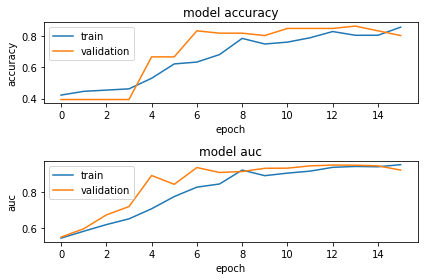

In [46]:
# plotting categorical and validation accuracy over epochs
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['categorical_accuracy'])
ax1.plot(history.history['val_categorical_accuracy'])
ax1.set_title('model accuracy')
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.legend(['train', 'validation'], loc='upper left')

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['auc_8'])
ax2.plot(history.history['val_auc_8'])
ax2.set_title('model auc')
ax2.set_xlabel('epoch')
ax2.set_ylabel('auc')
ax2.legend(['train', 'validation'], loc='upper left')
fig.tight_layout()
plt.show()


In [47]:
test_steps_per_epoch = numpy.math.ceil(validation_iterator.samples / validation_iterator.batch_size)
predictions = model.predict(validation_iterator, steps=test_steps_per_epoch)
test_steps_per_epoch = numpy.math.ceil(validation_iterator.samples / validation_iterator.batch_size)
predicted_classes = numpy.argmax(predictions, axis=1)
true_classes = validation_iterator.classes
class_labels = list(validation_iterator.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)   
 
cm=confusion_matrix(true_classes,predicted_classes)
print(cm)

              precision    recall  f1-score   support

       Covid       0.47      0.35      0.40        26
      Normal       0.19      0.30      0.23        20
   Pneumonia       0.13      0.10      0.11        20

    accuracy                           0.26        66
   macro avg       0.26      0.25      0.25        66
weighted avg       0.28      0.26      0.26        66

[[ 9 13  4]
 [ 5  6  9]
 [ 5 13  2]]
